In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF

/content/drive/MyDrive/CINEMATOGRAF


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/CINEMATOGRAF


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
#!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

/content/drive/MyDrive/CINEMATOGRAF
/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.8 MB/s eta 0:00:00


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/drive/MyDrive/CINEMATOGRAF
mkdir: cannot create directory ‘/content/drive/MyDrive/CINEMATOGRAF/weights’: File exists
/content/drive/MyDrive/CINEMATOGRAF/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/CINEMATOGRAF/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/drive/MyDrive/CINEMATOGRAF/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


smoke tensor([0.6281, 0.3182, 0.1349, 0.2591])  conf: tensor(0.4191)
cigarette tensor([0.3232, 0.3544, 0.0183, 0.0159])  conf: tensor(0.4499)
cigarette tensor([0.6196, 0.4946, 0.0124, 0.0631])  conf: tensor(0.4704)


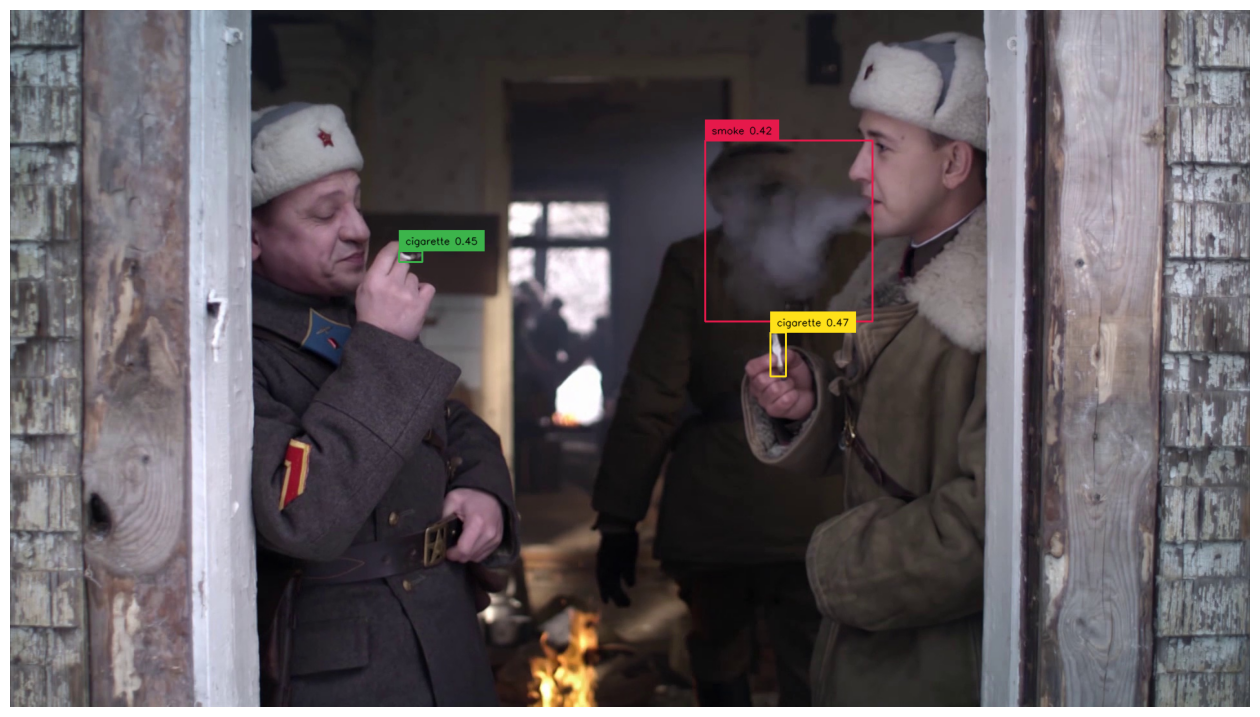

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "0001_frame0-00-00.50.jpg"
IMAGE_PATH = '/content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0001_frame0-00-00.50.jpg'
IMAGE_PATH='/content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0012_frame0-00-10.52.jpg'
IMAGE_PATH='/content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0064_frame0-00-09.52.jpg'

TEXT_PROMPT = "cigarette.ashtray.smoke"

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

for box,conf,phrase in zip(boxes, logits, phrases):
  print(phrase, box, ' conf:',conf)


annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF/

/content/drive/MyDrive/CINEMATOGRAF


In [ ]:
!mkdir ds_02_label

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:909: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


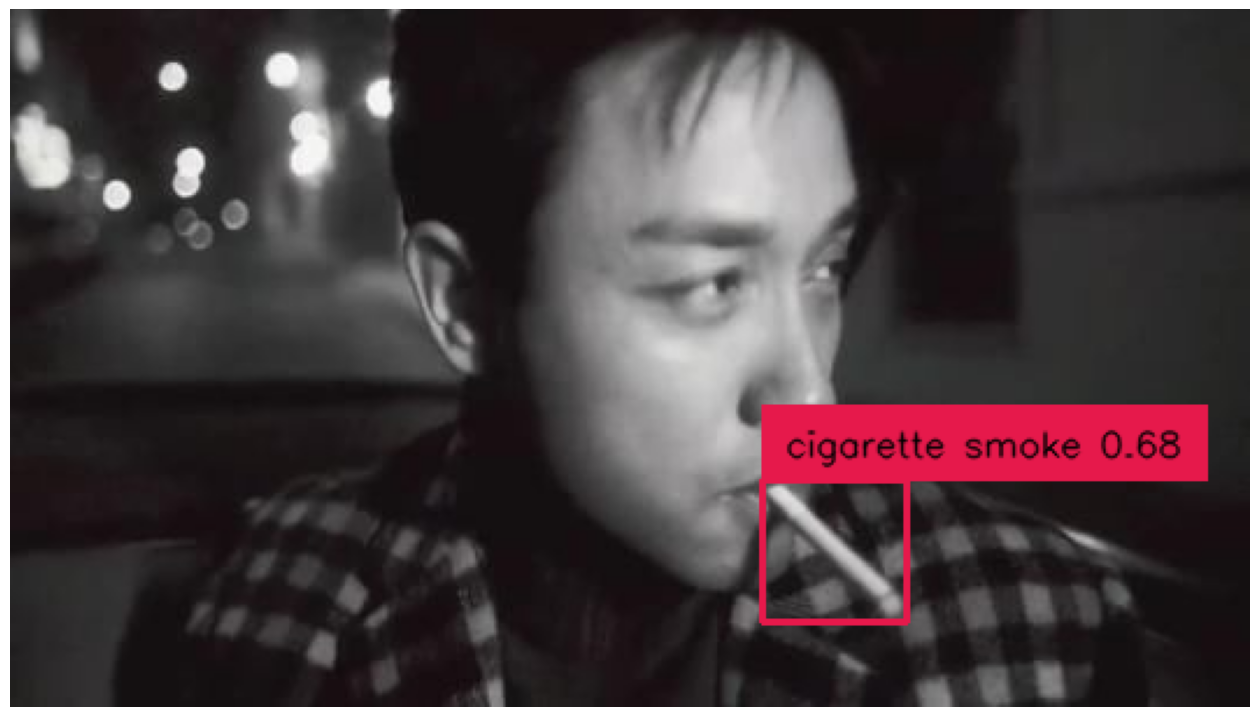

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "000002.jpeg"
IMAGE_PATH = '/content/drive/MyDrive/CINEMATOGRAF/ds_smoking/val/images/000002.jpg'

TEXT_PROMPT = "cigarette smoke"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.45

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)


annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF/ds_02_all

/content/drive/MyDrive/CINEMATOGRAF/ds_02_all


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!rm *.txt

In [ ]:
import warnings
import os
from pathlib import Path
import numpy as np
from PIL import Image
from io import BytesIO
#from lang_sam import LangSAM


#TEXT_PROMPT = "cigarette smoke"
TEXT_PROMPT = "cigarette"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25


#image_path='/content/drive/MyDrive/CINEMATOGRAF/ds_02'
#label_path='/content/drive/MyDrive/CINEMATOGRAF/ds_02_label'

image_path = '/content/drive/MyDrive/CINEMATOGRAF/ds_02_all'
label_path = '/content/drive/MyDrive/CINEMATOGRAF/ds_02_all'

text_prompt = "cigarette"

height, width = 1.0, 1.0

def main():
    for image in os.listdir(image_path):
      base=Path(image).stem
      image_source, image_pil = load_image(image_path+'/'+image)
      boxes, logits, phrases = predict(
          model=model,
          image=image_pil,
          caption=text_prompt,
          box_threshold=BOX_TRESHOLD,
          text_threshold=TEXT_TRESHOLD
      )
      label=label_path+'/'+base+'.txt'
      txt = open(label, "w")
      print('file:',label)
      print(boxes)

      if len(boxes) == 0:
          print(f"No objects of the '{text_prompt}' prompt detected in the image.")
          txt.close()

      else:
          # Save the boxes

          i=-1
          for box, logit in zip(boxes,logits):
            i+=1
            x_min, y_min, x_max, y_max = box
            #x_min /= width
            #x_max /= width
            #y_min /= height
            #y_max /= height


            confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
            #box_width = x_max - x_min
            #box_height = y_max - y_min
            #x_center = x_min+box_width/2
            #y_center = y_min + box_height/2
            sl = f"Logit {i+1}: {confidence_score}\n"
            #s=f"0 {x_center} {y_center} {box_width} {box_height}\n"
            s=f"0 {x_min} {y_min} {x_max} {y_max}\n"
            print(sl,s)
            txt.write(s)
          print(f"found",i)
          txt.close()

if __name__ == "__main__":
    main()


Выходные данные были обрезаны до нескольких последних строк (5000).
found 0
file: /content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0059_frame0-00-15.52.txt
tensor([[0.6052, 0.5953, 0.0502, 0.1085]])
Logit 1: 0.73
 0 0.6051720380783081 0.5953203439712524 0.05022646114230156 0.10845378786325455

found 0
file: /content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0060_frame0-00-00.52.txt
tensor([[0.4811, 0.4624, 0.2632, 0.1889]])
Logit 1: 0.49
 0 0.48110079765319824 0.4623807668685913 0.26324281096458435 0.18887554109096527

found 0
file: /content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0061_frame0-00-01.52.txt
tensor([[0.5396, 0.6767, 0.1689, 0.0421],
        [0.1737, 0.2667, 0.0195, 0.0160]])
Logit 1: 0.41
 0 0.5396138429641724 0.6767141819000244 0.16890226304531097 0.04214828833937645

Logit 2: 0.49
 0 0.17370420694351196 0.2667483389377594 0.019463524222373962 0.01604125276207924

found 1
file: /content/drive/MyDrive/CINEMATOGRAF/ds_02_all/0061_frame0-00-02.52.txt
tensor([[0.1544, 0.2719, 0.0165, 0

In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF/ds_02_all

/content/drive/MyDrive/CINEMATOGRAF/ds_02_all


In [ ]:
!ls -ltr *.txt | wc -l
!ls -ltr *.jpg | wc -l

3099
3099


In [ ]:
ls -l *.jpg | wc -l

727


In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF/ds_02_label

/content/drive/MyDrive/CINEMATOGRAF/ds_02_label


In [ ]:
!ls -l *.txt | wc -l

ls: cannot access '*.txt': No such file or directory
0


In [ ]:
ls -ltr | tail -10

-rw------- 1 root root   0 Sep  4 15:12 0150_frame0-00-09.52.txt
-rw------- 1 root root  83 Sep  4 15:12 0083_frame0-00-02.52.txt
-rw------- 1 root root  81 Sep  4 15:12 0080_frame0-00-01.52.txt
-rw------- 1 root root   0 Sep  4 15:12 0202_frame0-00-28.52.txt
-rw------- 1 root root  81 Sep  4 15:12 0150_frame0-00-02.52.txt
-rw------- 1 root root  82 Sep  4 15:12 0150_frame0-00-04.52.txt
-rw------- 1 root root  79 Sep  4 15:12 0079_frame0-00-02.52.txt
-rw------- 1 root root   0 Sep  4 15:12 0146_frame0-00-03.52.txt
-rw------- 1 root root  81 Sep  4 15:12 0077_frame0-00-03.52.txt
-rw------- 1 root root 162 Sep  4 15:12 0144_frame0-00-03.52.txt


In [ ]:
%cd /content/drive/MyDrive/CINEMATOGRAF/ds_02_label

/content/drive/MyDrive/CINEMATOGRAF/ds_02_label


In [ ]:
import os

impath='/content/drive/MyDrive/CINEMATOGRAF/ds_02'

for lab in os.listdir():
  print(lab)
  base, ext=lab.split('.txt')

  im=impath+'/'+base+'.jpg'
  !mv {lab} ../ds_02_all
  print(im)
  !mv {im} ../ds_02_all
  #!mv lab ../ds_02_all